# Data Analysis on Covid-19 DataSet

<font face = "Verdana" size ="2">Tracks the spread of the novel coronavirus Using Python, also known as SARS-CoV-2. It is a contagious respiratory virus that first started in Wuhan in December 2019. On 2/11/2020, the disease is officially named COVID-19 by the World Health Organization. 
    <br><br>Data: <a href='https://github.com/CSSEGISandData/COVID-19'>https://github.com/CSSEGISandData/COVID-19</a>
    <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>WHO</a>
    <br><br>Map Visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>Johns Hopkins</a>
</font>
   <br>
   
 <font face = "Verdana" size ="1">
<center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'>
 Source: https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg </center> 
    
 <font face = "Verdana" size ="4"> Keep strong, world! Stay safe. </font>







<h2>Field description</h2>

Province_State - The name of the State within the USA.

Country_Region - The name of the Country (US).

Last_Update - The most recent date the file was pushed.

Lat - Latitude.

Long_ - Longitude.

Confirmed - Aggregated confirmed case count for the state.

Deaths - Aggregated Death case count for the state.

Recovered - Aggregated Recovered case count for the state.

Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

Incident_Rate - confirmed cases per 100,000 persons.

People_Tested - Total number of people who have been tested.

People_Hospitalized - Total number of people hospitalized.

Mortality_Rate - Number recorded deaths / Number confirmed cases.

UID - Unique Identifier for each row entry.

ISO3 - Officialy assigned country code identifiers.

Testing_Rate - Total number of people tested per 100,000 persons.

Hospitalization_Rate - Total number of people hospitalized / Number of confirmed cases.


In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [51]:
a=datetime.datetime.now()
if (a.month)< (10):
    month='0'+str(a.month)
else:
    month=str(a.month)
    
m='-'.join([month,str(a.day),str(a.year)])
m=m+'.csv'
import requests as rq
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+m
res=rq.get(url)

if res.status_code==200:
    url=url
    
else:
    if (a.month)< (10):
        month='0'+str(a.month)
        day=str(a.day-1) 
        
    else:
        month=str(a.month)
        day=str(a.day-1)
    m='-'.join([month,day,str(a.year)])
    m=m+'.csv'
    url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+m
try:
    res=rq.get(url)
    
    if res.status_code==200:
        url=url
        
    else:
        day=str(int(day)-1)
        m='-'.join([month,day,str(a.year)])
        
        m=m+'.csv'
        url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+m
except:
    pass
         
   
url

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-29-2020.csv'

Import the data (make sure you update this on a daily basis)

In [52]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv(url)

In [53]:
confirmed_df.to_csv('confirmed_df.csv',index=False)
deaths_df.to_csv('deaths_df.csv',index=False)
recoveries_df.to_csv('recoveries_df.csv',index=False)
latest_data.to_csv('latest_data_df.csv',index=False)

In [54]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-30 02:32:27,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-30 02:32:27,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-30 02:32:27,37.767072,-75.632346,229,4,0,225,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-30 02:32:27,43.452658,-116.241552,662,16,0,646,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-30 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [6]:
deaths_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,36,40,42,43,47,50,57,58,60
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,27,27,27,27,28,28,30,30
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,384,392,402,407,415,419,425,432,437,444
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,37,40,40,40,40,41,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [8]:
cols = confirmed_df.keys()

*Get all the dates for the outbreak*

In [9]:
confirmed_df.loc[:, cols[4]:cols[-1]].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,0,0,0,0,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,0,0,0,0,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,0,0,0,0,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,0,0,0,0,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,0,0,0,0,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [10]:
deaths_df.loc[:, cols[4]:cols[-1]].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,0,0,0,0,0,0,0,0,0,0,...,36,36,40,42,43,47,50,57,58,60
1,0,0,0,0,0,0,0,0,0,0,...,26,26,27,27,27,27,28,28,30,30
2,0,0,0,0,0,0,0,0,0,0,...,384,392,402,407,415,419,425,432,437,444
3,0,0,0,0,0,0,0,0,0,0,...,37,37,37,37,40,40,40,40,41,42
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [11]:
 recoveries_df.loc[:, cols[4]:cols[-1]].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,0,0,0,0,0,0,0,0,0,0,...,135,150,166,179,188,188,207,220,228,252
1,0,0,0,0,0,0,0,0,0,0,...,327,345,356,385,394,403,410,422,431,455
2,0,0,0,0,0,0,0,0,0,0,...,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702
3,0,0,0,0,0,0,0,0,0,0,...,248,282,309,333,344,344,344,385,398,423
4,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,7


In [12]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = []
india_cases=[]

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
india_deaths = [] 

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = []
india_recoveries = []


In [14]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())

<h3>Getting daily increases</h3>

In [15]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [16]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [17]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [18]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Future forcasting

In [19]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)


In [20]:
adjusted_dates = future_forcast[ :-10]

In [21]:
len(future_forcast)

109

**Convert integer into datetime for better visualization**

In [22]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [24]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False) 

In [25]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# svm_confirmed = svm_search.best_estimator_
# svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
# svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
# svm_pred = svm_confirmed.predict(future_forcast)

MAE: 821055.4966194658
MSE: 705726323613.2452


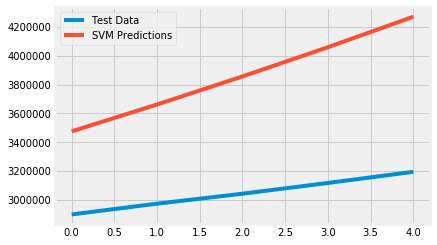

In [27]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [28]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [29]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 205605.2401544721
MSE: 45538053331.690895


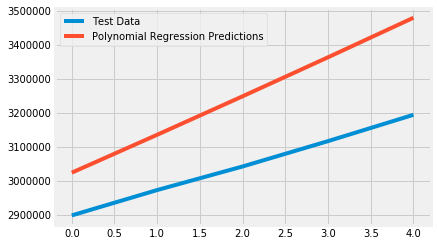

In [30]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

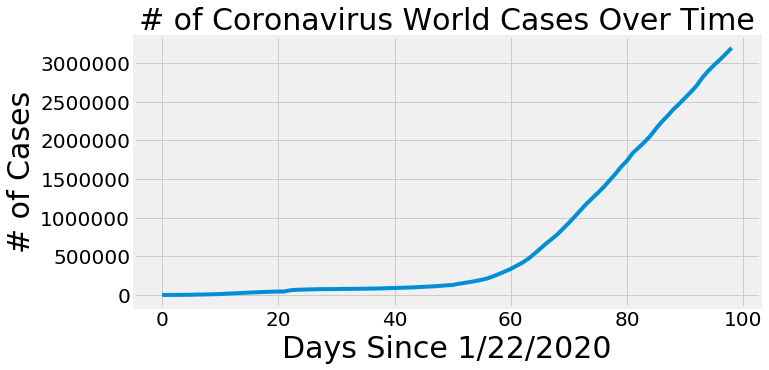

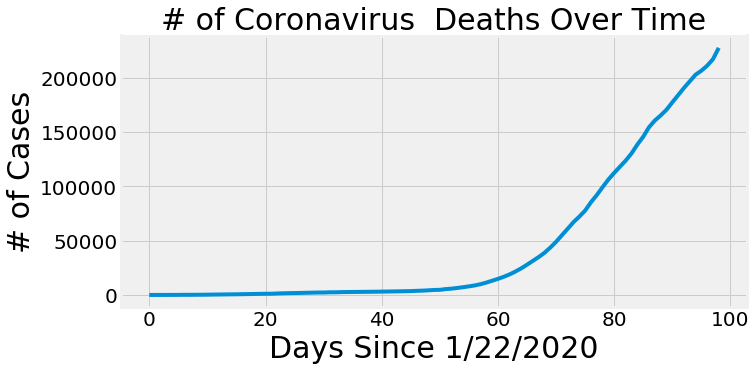

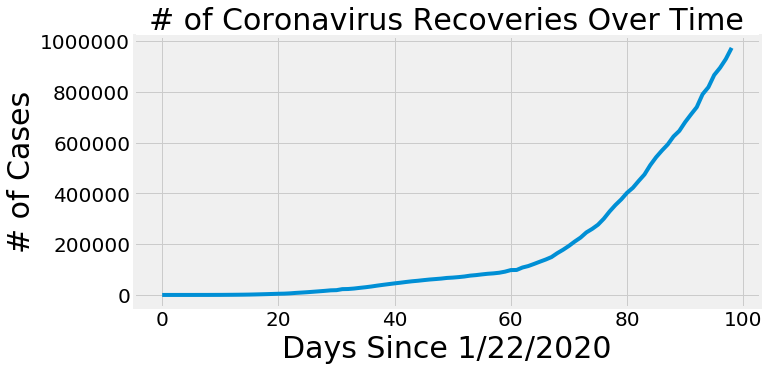

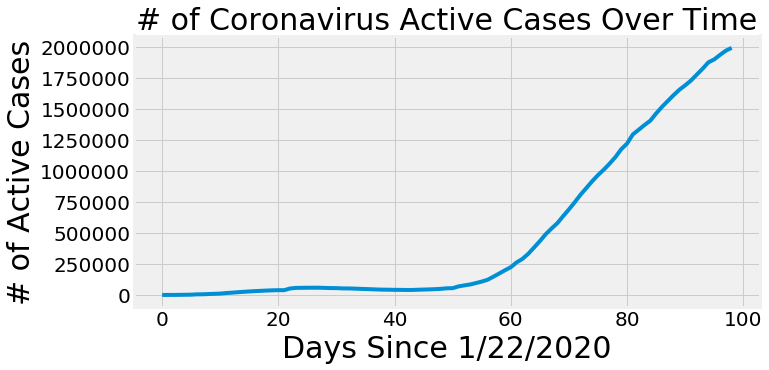

In [49]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus World Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus  Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

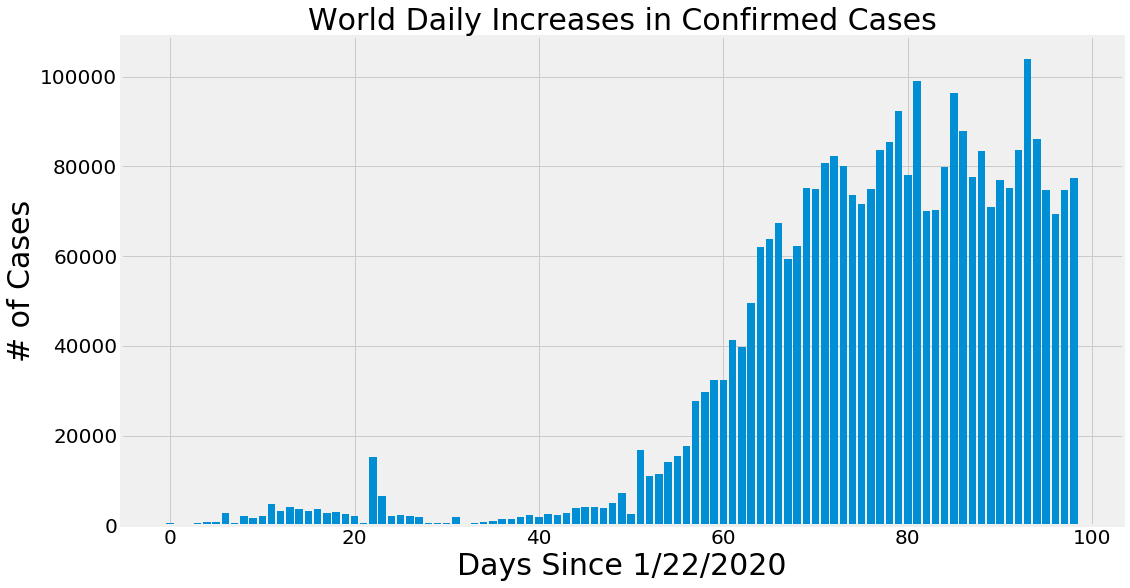

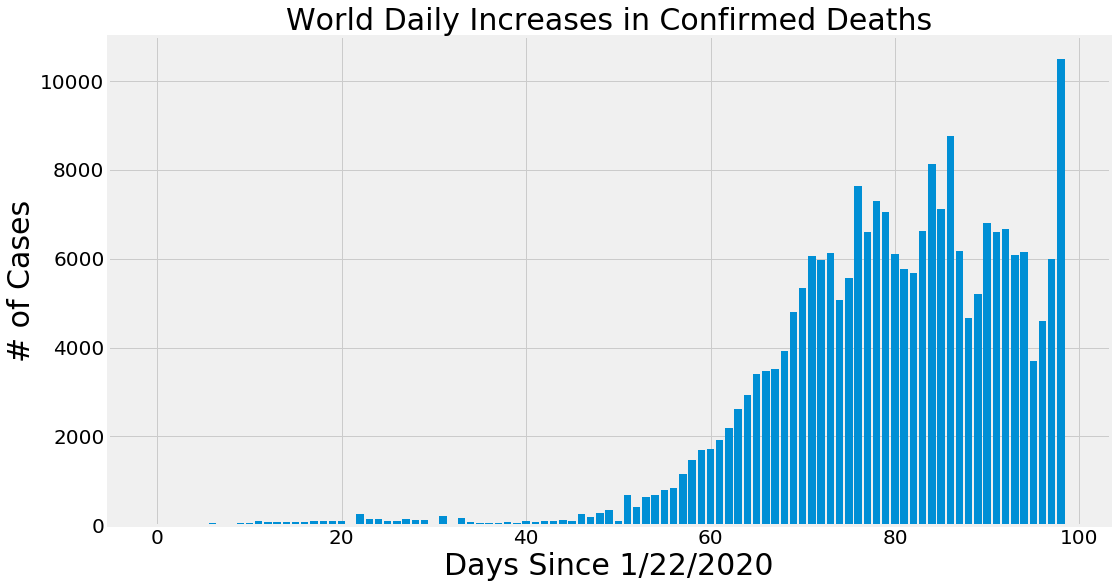

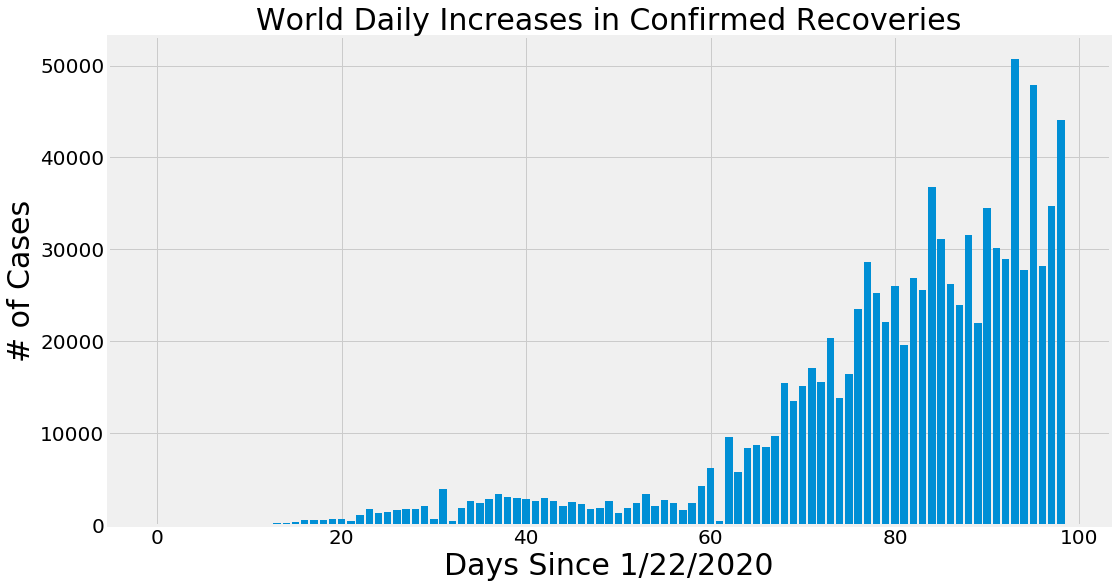

In [32]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

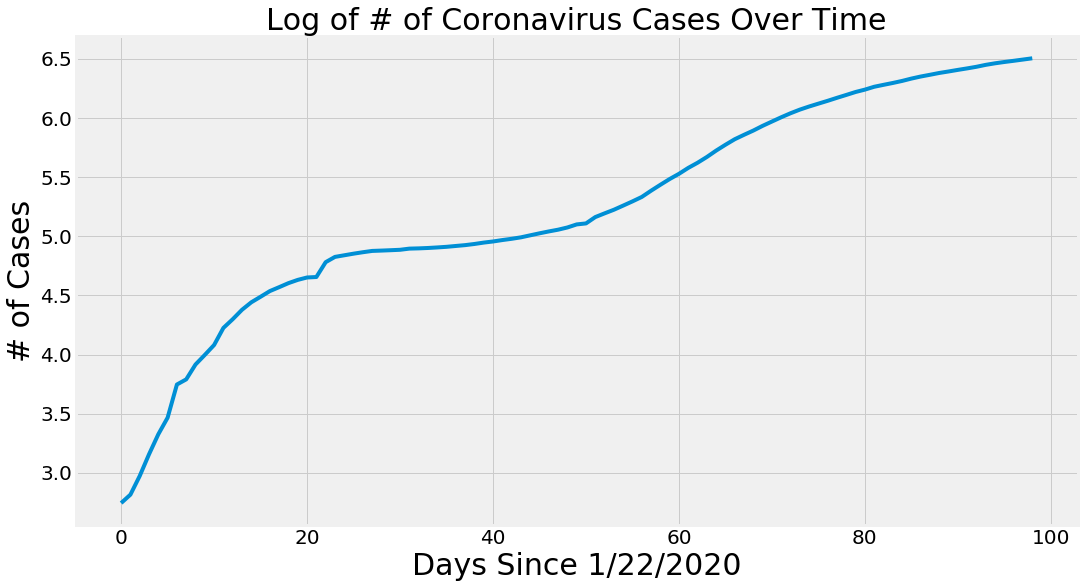

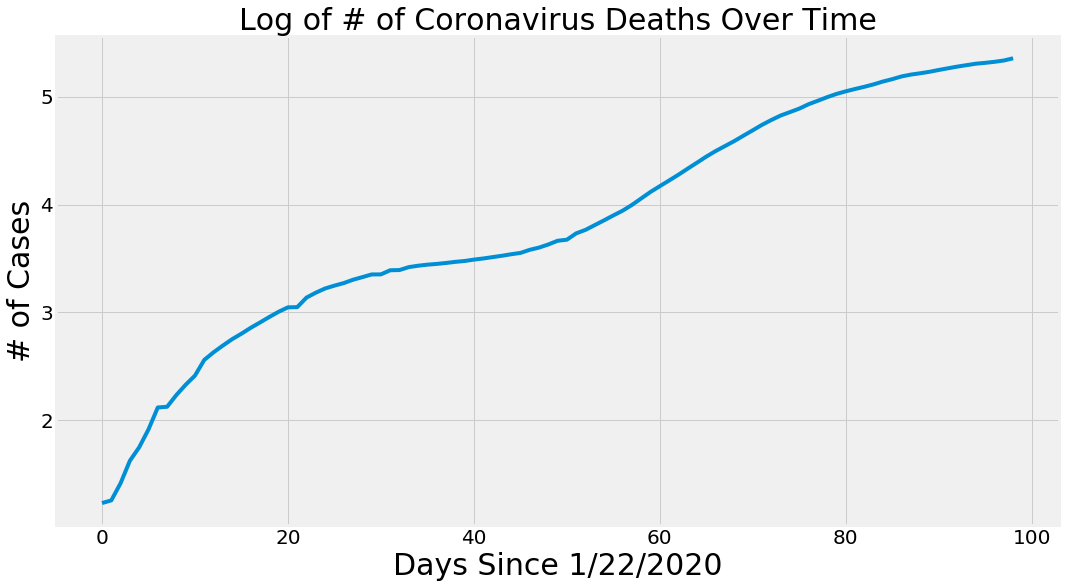

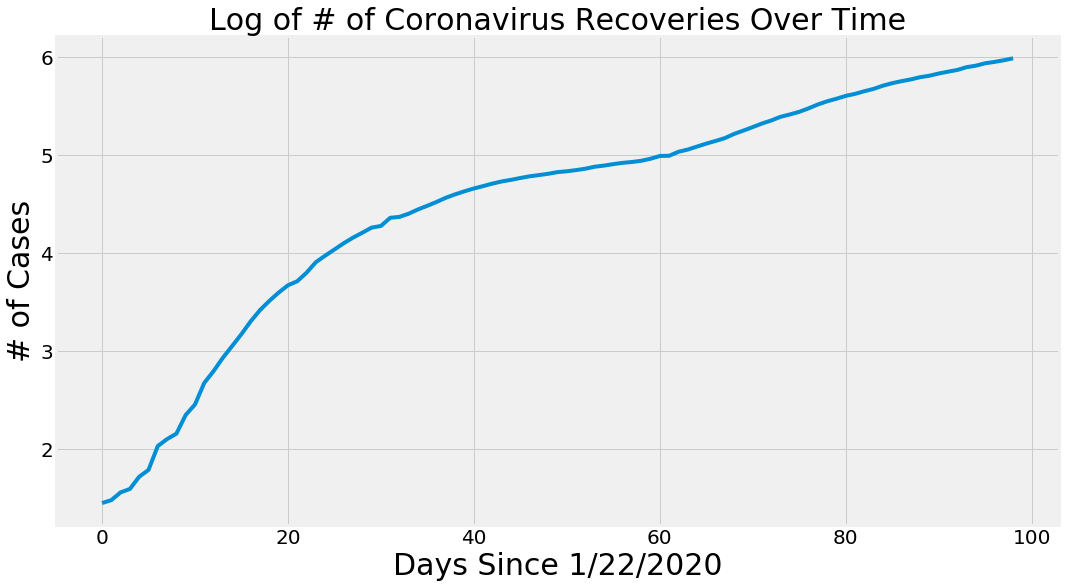

In [33]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [34]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

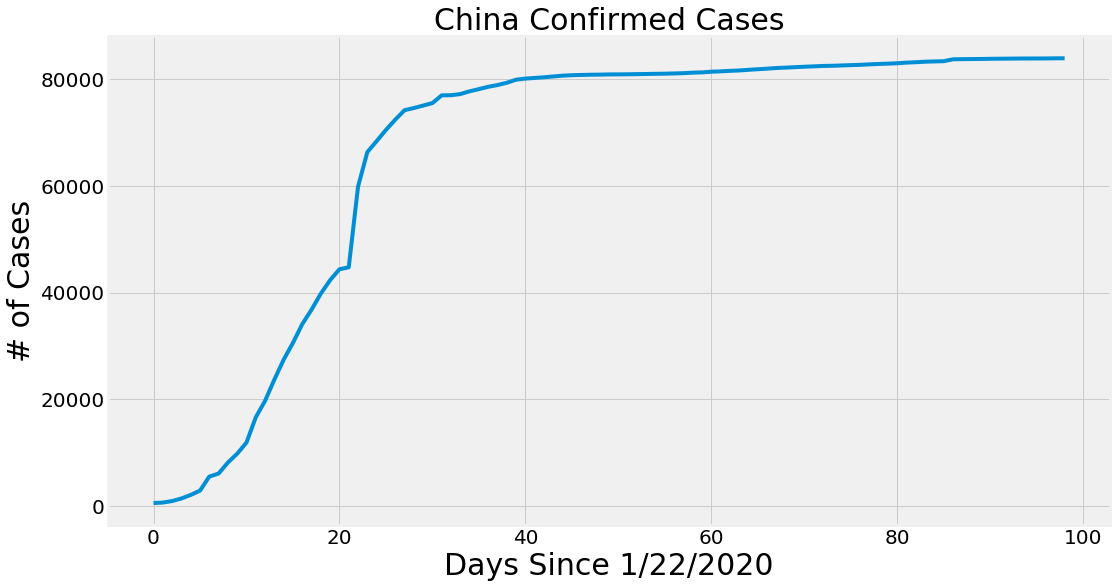

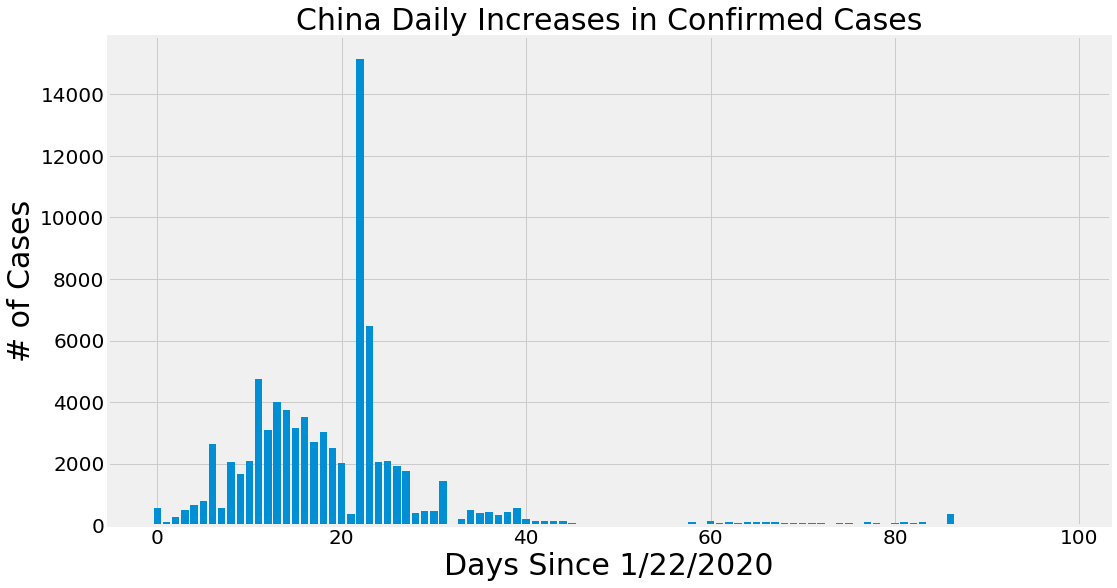

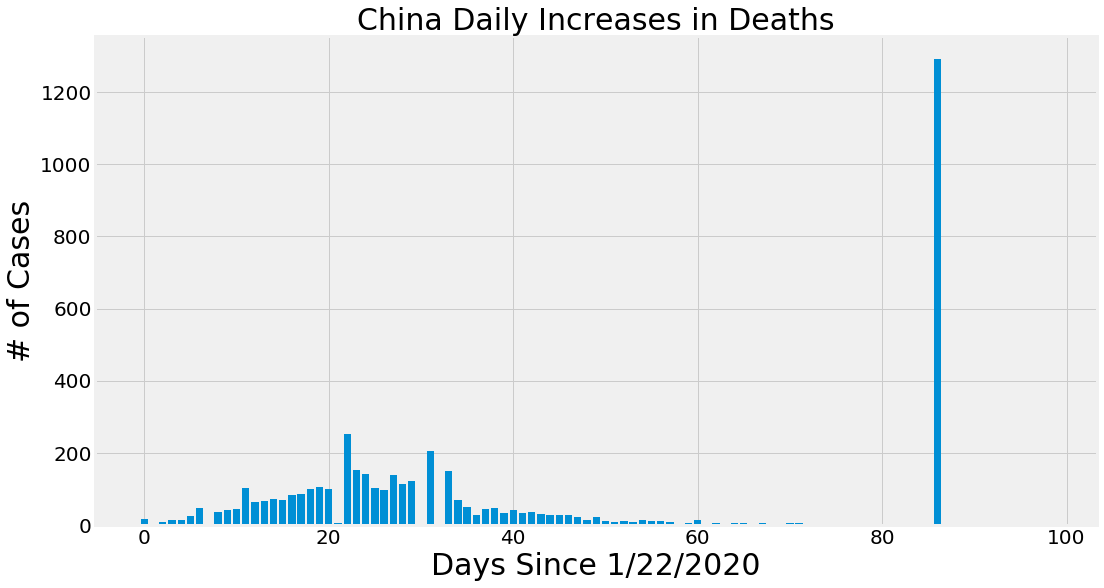

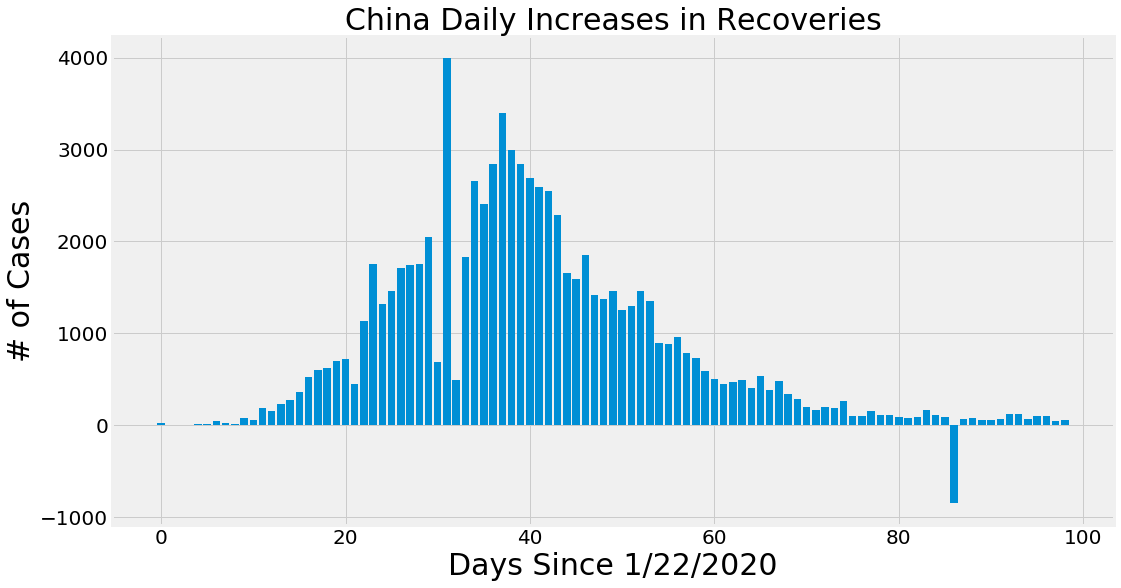

In [35]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

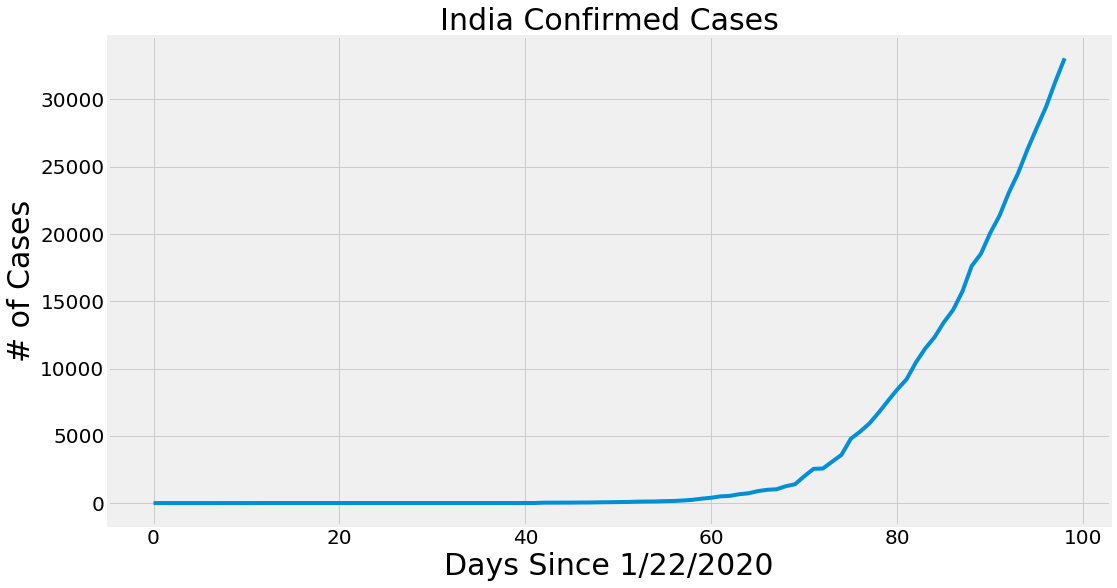

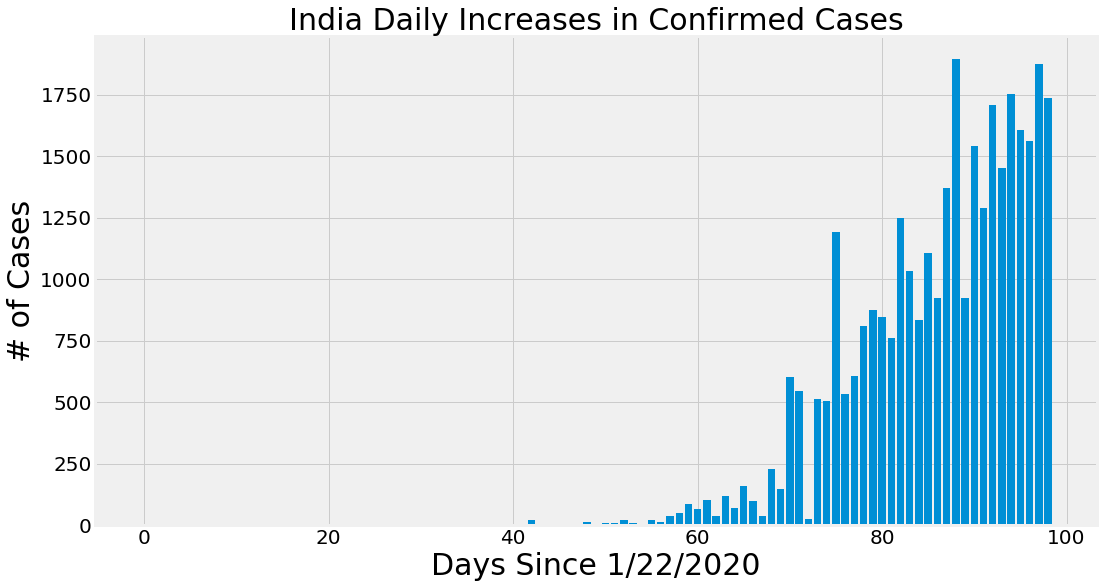

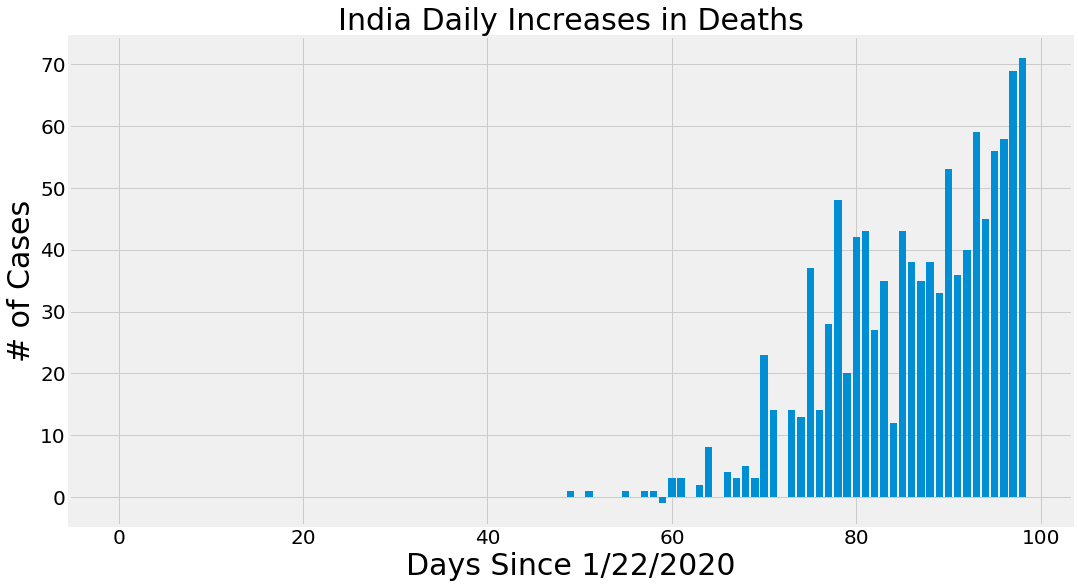

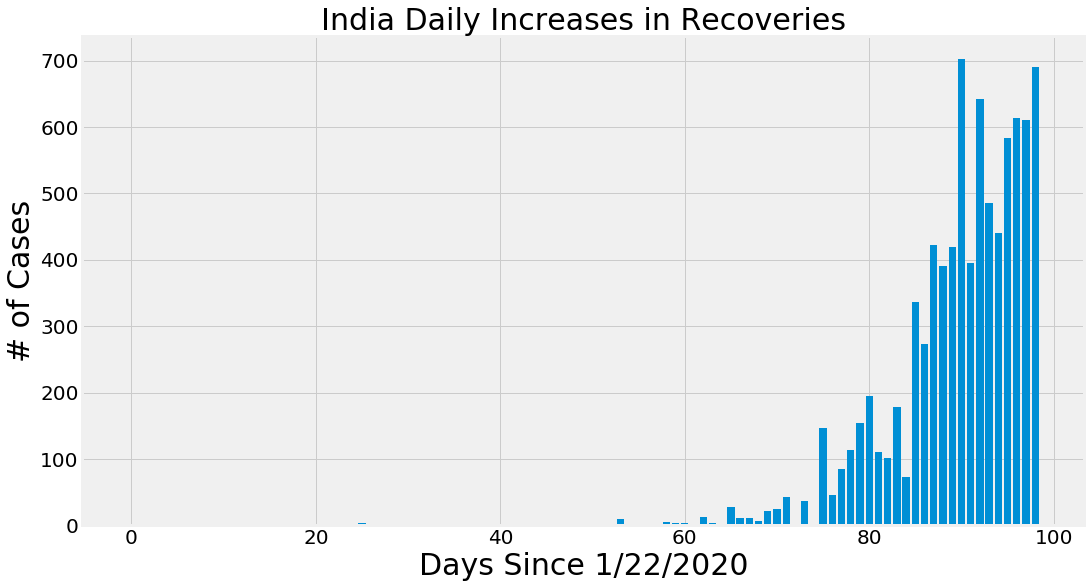

In [36]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

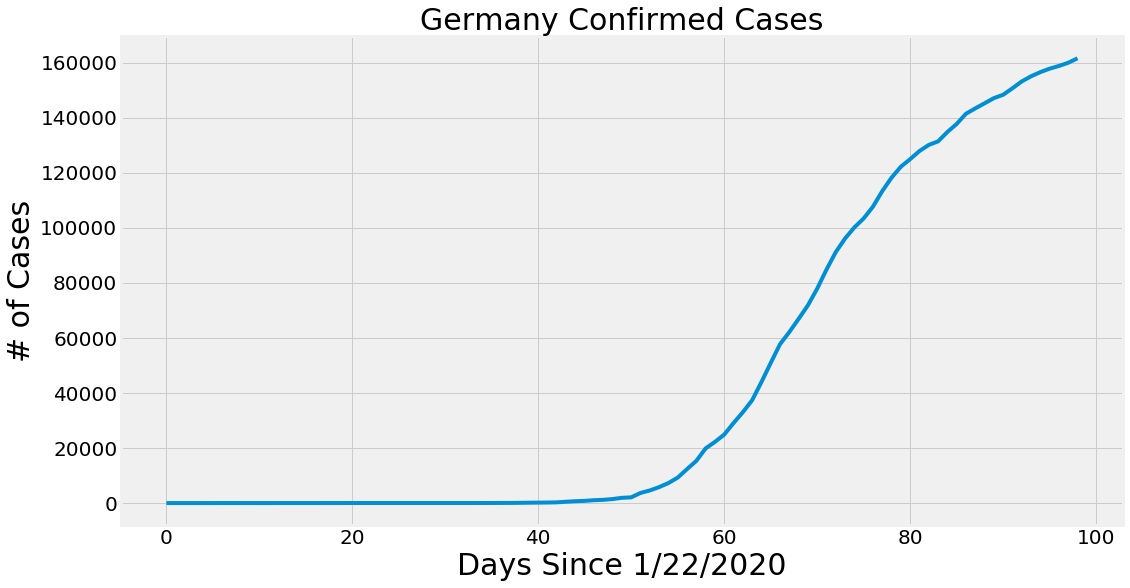

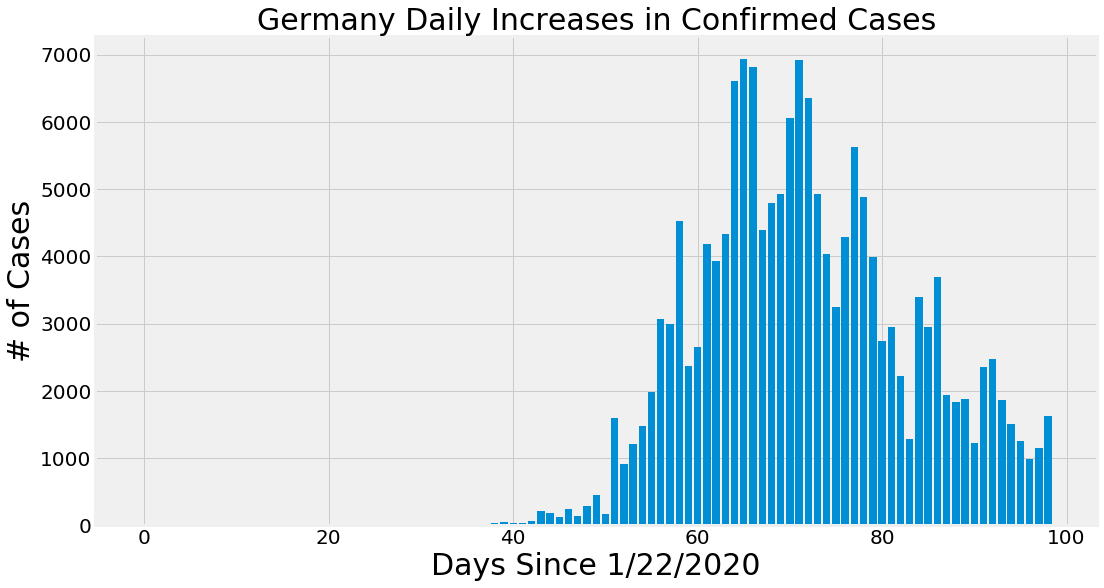

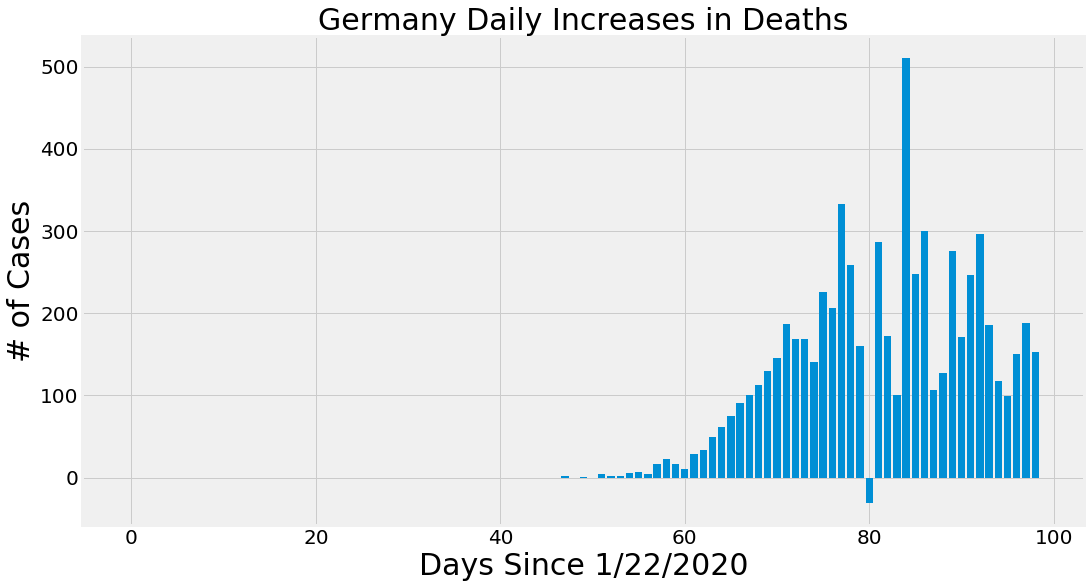

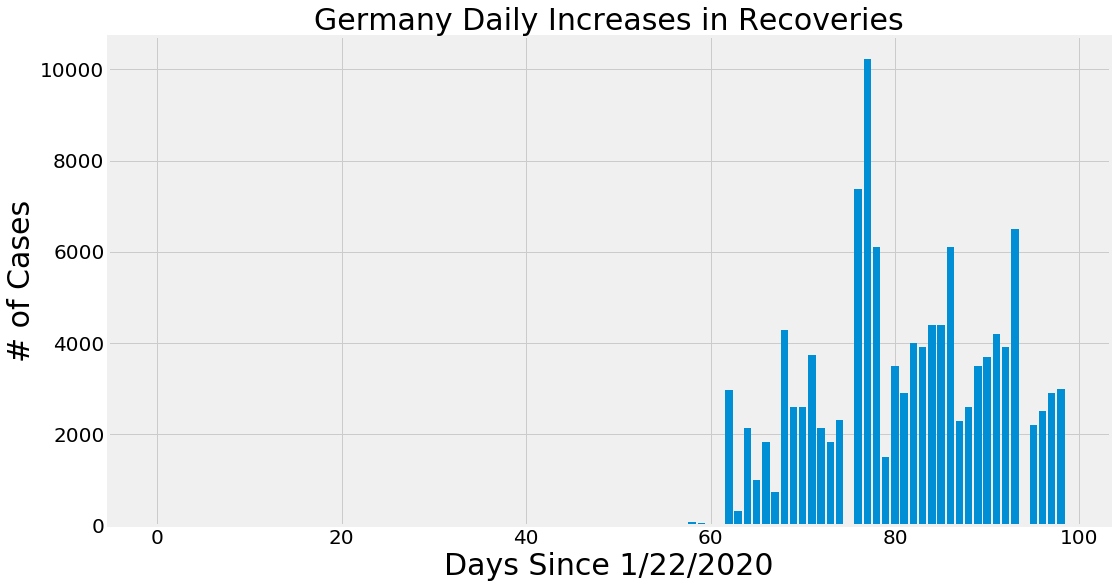

In [37]:
country_plot(adjusted_dates, germany_cases, germany_daily_increase, germany_daily_death, germany_daily_recovery, 'Germany')

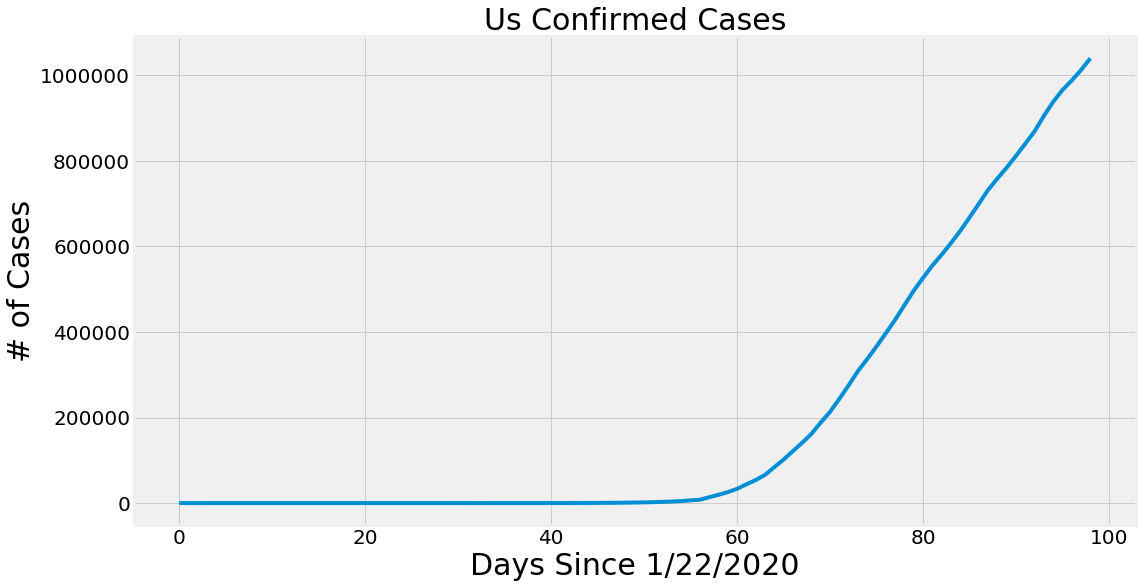

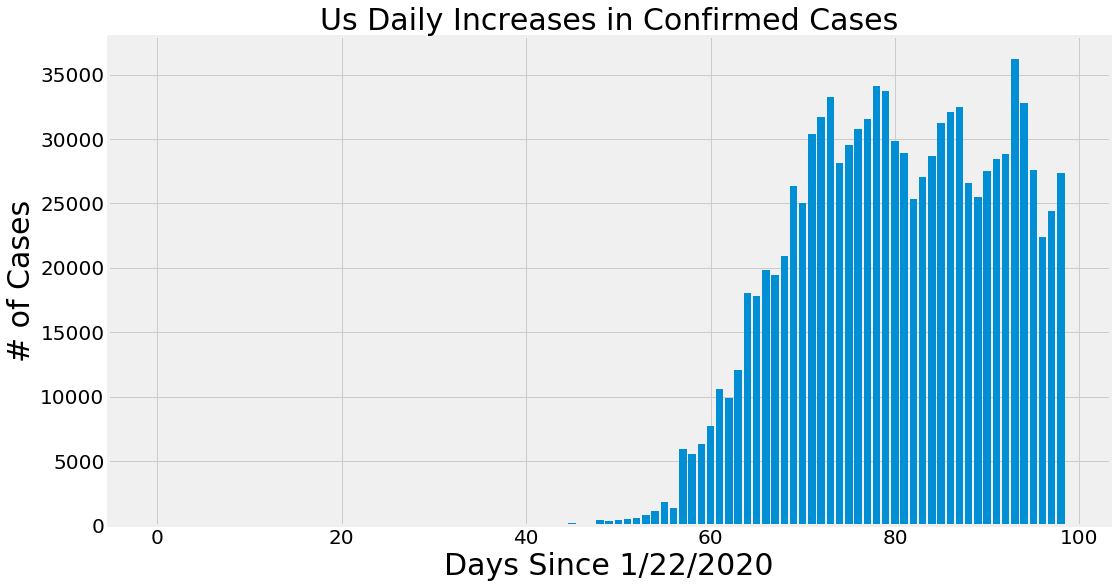

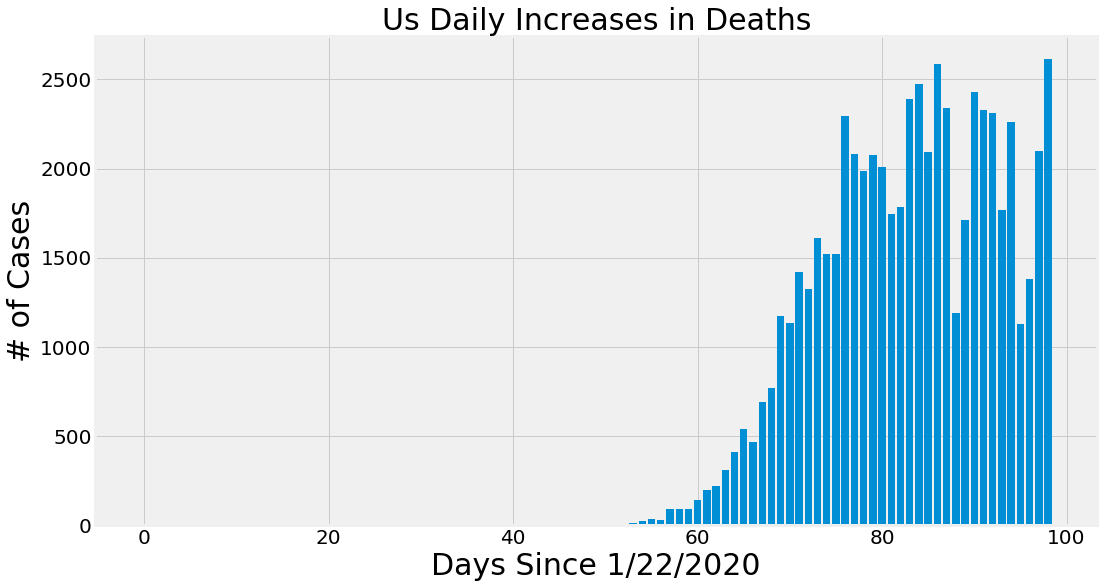

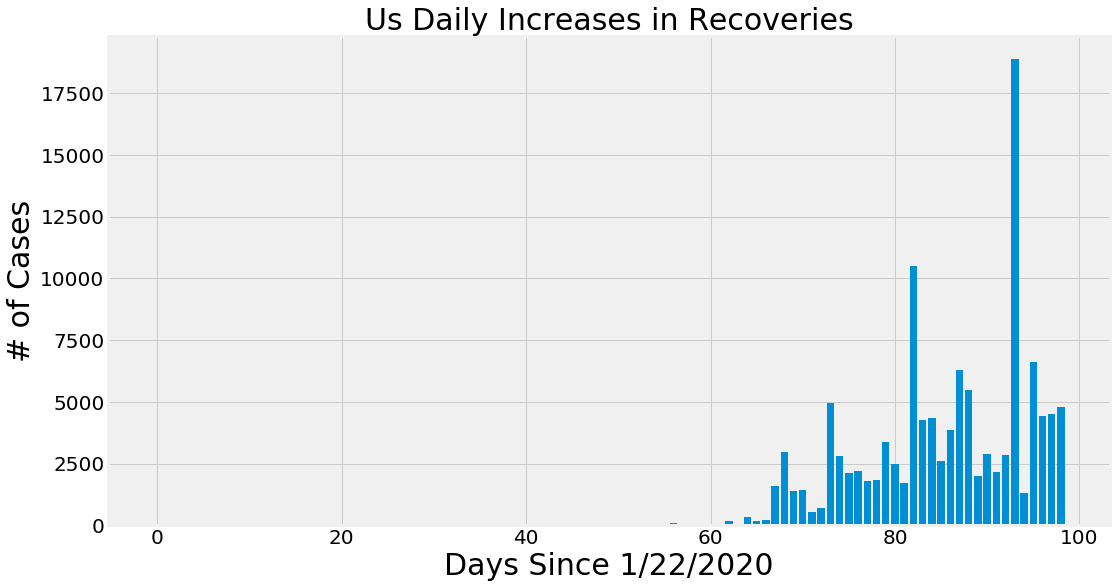

In [38]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'Us')

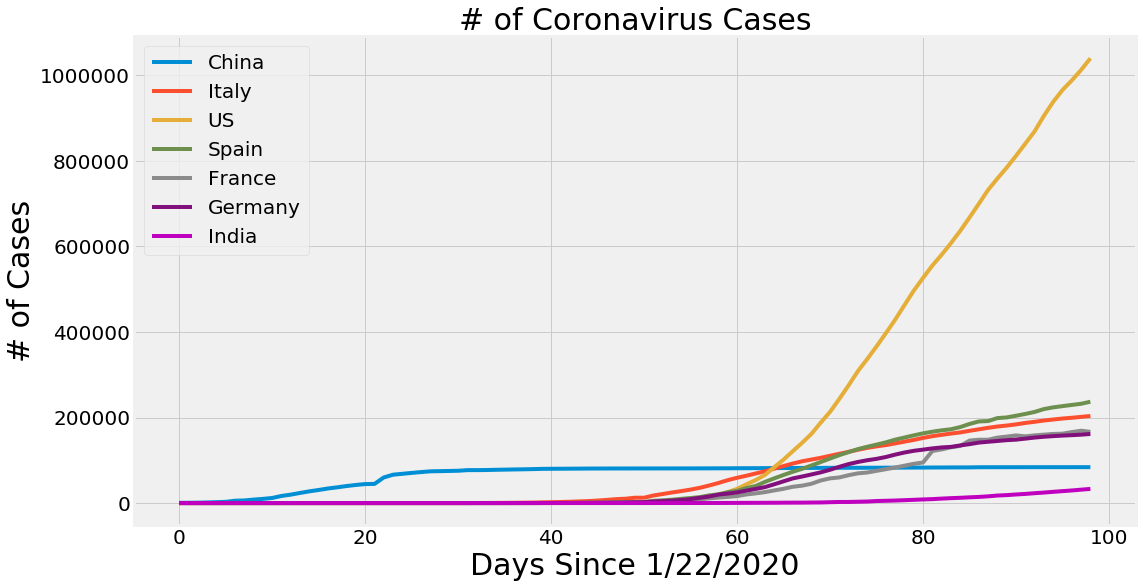

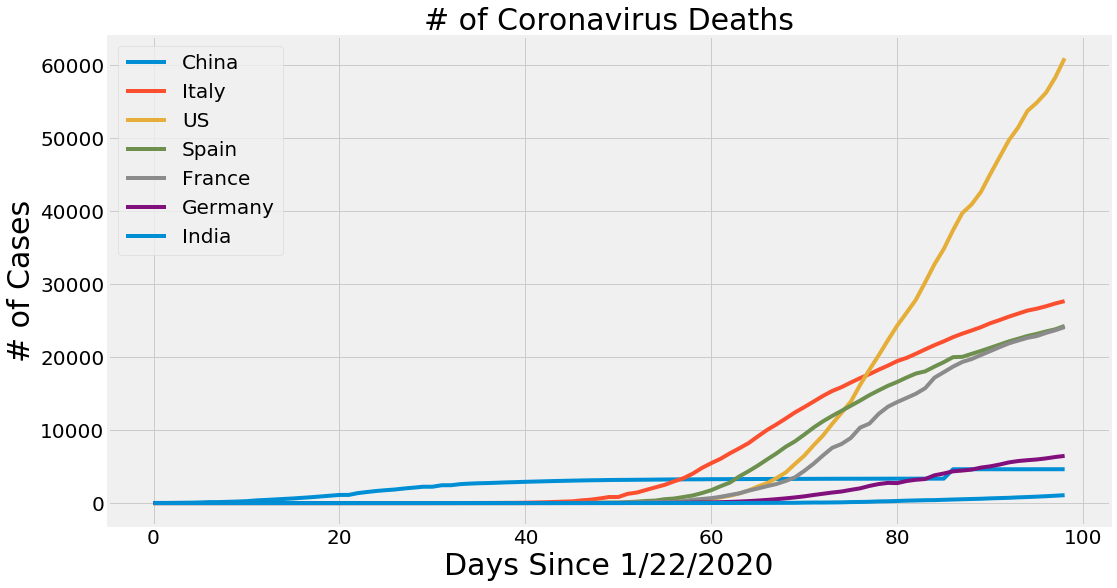

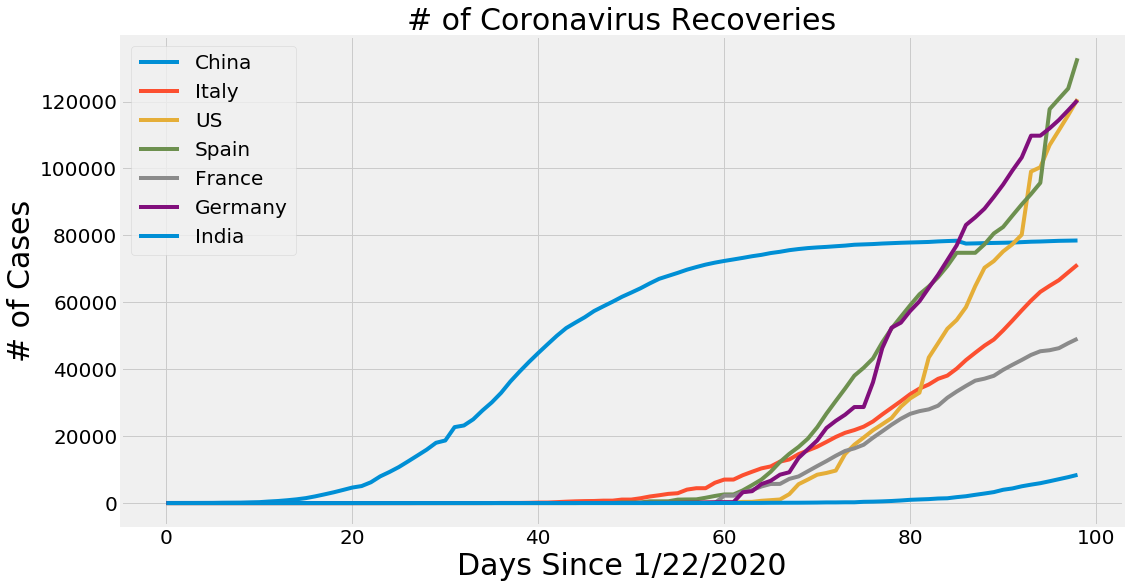

In [39]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases,'m')
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)

plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','India'], prop={'size': 20})
plt.xticks(size=20)

plt.yticks(size=20)
plt.show()

In [40]:
# plt.figure(figsize=(16, 9))
# plt.plot(adjusted_dates, china_recoveries)
# plt.plot(adjusted_dates, italy_recoveries)
# plt.plot(adjusted_dates, us_recoveries)
# plt.plot(adjusted_dates, spain_recoveries)
# plt.plot(adjusted_dates, france_recoveries)
# plt.plot(adjusted_dates, germany_recoveries)
# plt.plot(adjusted_dates, india_recoveries)
# plt.title('# of Coronavirus Recoveries', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','India'], prop={'size': 20})
# b=np.arange(1, len(adjusted_dates),5)
# a=future_forcast_dates[:len(b):]
# plt.xticks(np.arange(1, len(adjusted_dates), step=5),a,rotation='vertical')
# plt.yticks(size=20)

# plt.show()

In [41]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

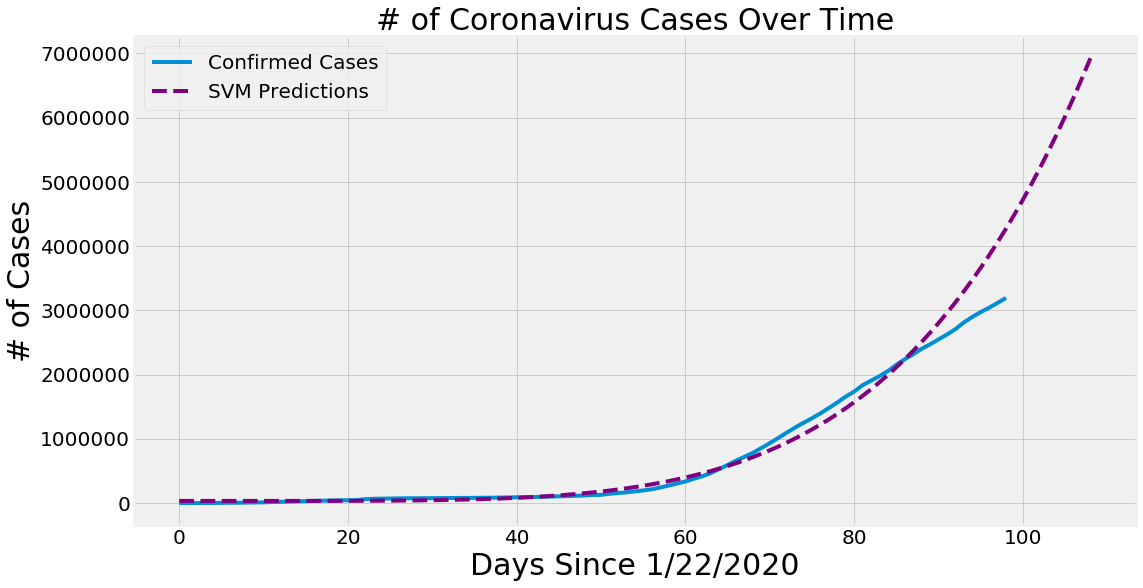

In [42]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

In [43]:
#india
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_cases, test_size=0.05, shuffle=False) 
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)


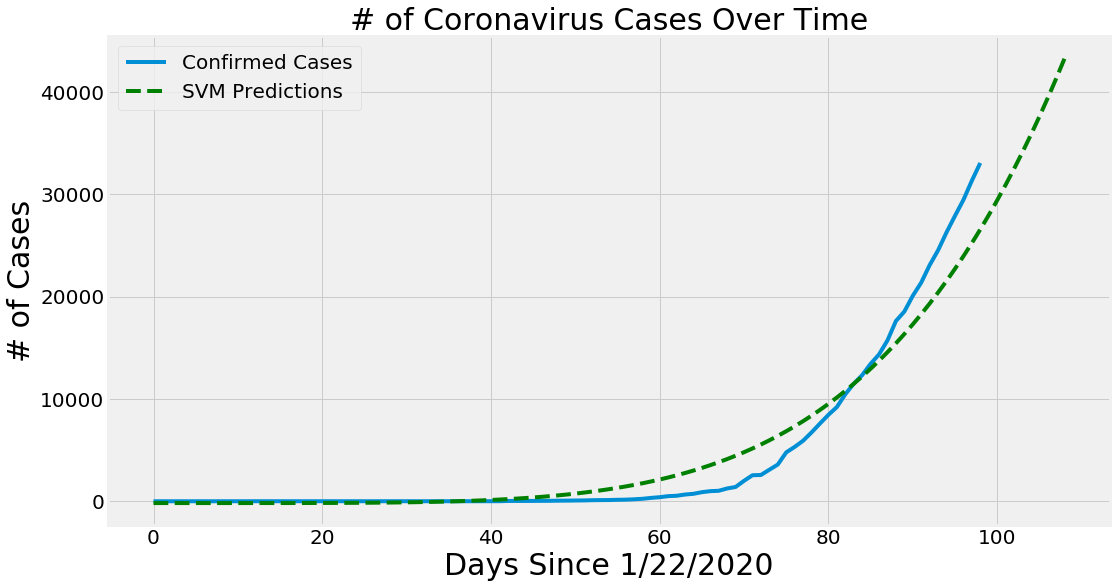

In [44]:
plot_predictions(adjusted_dates, india_cases, svm_pred, 'SVM Predictions', 'green')

In [45]:
adjusted_dates

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])